### Sistema de Recomendação com Filtros Colaborativos

Contexto do Problema: Sistema de Recomendação de Filmes
O objetivo do problema foi criar um sistema de recomendação de filmes utilizando um método de filtragem colaborativa. O sistema foi projetado para recomendar filmes para os usuários com base em suas avaliações anteriores, comparando as preferências de um usuário com as preferências de outros usuários.

##### Base de Dados
A base de dados utilizada foi o MovieLens dataset, que contém informações sobre filmes e avaliações feitas por usuários. Este dataset é amplamente utilizado em sistemas de recomendação e contém dados de milhares de filmes e as avaliações feitas por diversos usuários.

A base de dados contém pelo menos duas tabelas principais:

Filmes: Contém informações sobre cada filme, como título e identificação.

Avaliações: Contém as avaliações dos filmes feitas pelos usuários, onde cada linha representa a avaliação de um filme por um usuário específico.

##### Técnica Utilizada

Para esse sistema de recomendação, utilizamos a técnica de filtragem colaborativa. Em particular, foi implementado um modelo baseado em similaridade de filmes (filtragem colaborativa baseada em item), onde a recomendação de filmes é feita com base em filmes semelhantes àqueles que o usuário já avaliou positivamente.

Aqui estão as etapas principais:

##### Matriz de Avaliações: 

Criamos uma matriz de avaliações, onde as linhas representam os usuários e as colunas representam os filmes. A célula contém a avaliação dada por um usuário a um filme específico. Os valores ausentes indicam que o usuário não avaliou aquele filme.

##### Matriz de Similaridade: 

Calculamos a similaridade entre os filmes com base nas avaliações dos usuários. Utilizamos a técnica de similaridade de cosseno, que mede o quão semelhantes são os filmes com base nas avaliações que receberam dos usuários. A matriz de similaridade contém valores de similaridade entre todos os pares de filmes.

##### Recomendações: 

Para recomendar filmes para um usuário, pegamos um filme que ele avaliou e, com base na similaridade, encontramos os filmes mais similares a ele. As pontuações de recomendação foram calculadas utilizando o produto escalar entre a similaridade de um filme e as avaliações dos usuários.

##### Normalização: 

Para melhorar a precisão das recomendações, aplicamos uma normalização, subtraindo as médias das avaliações dos filmes, de modo que filmes com avaliações mais altas não tenham peso desproporcional nas recomendações.


In [1]:
import pandas as pd

#Carregando dados de avaliação dos filmes
evaluate = pd.read_csv('../data/raw/u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Carregar os dados dos filmes
movies = pd.read_csv('../data/raw/u.item', sep='|', header=None, encoding='latin-1', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

#### Análise Exploratória (EDA)

##### Visualizando primeiras linhas dos dados

In [2]:
evaluate.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Distribuição de avaliação dos filmes

Verificando a distribuição dos dados, vemos que a maioria dos usuário dão nota 4 nos filmes que assistem.

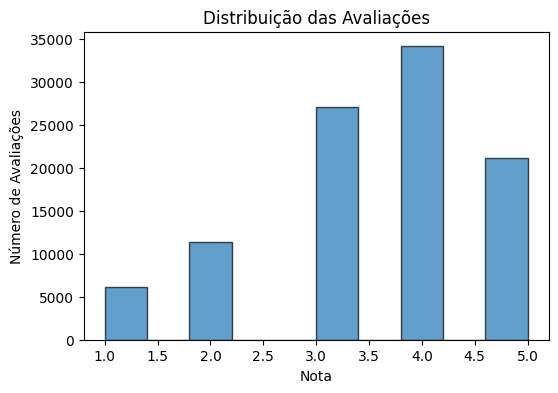

In [4]:
import matplotlib.pyplot as plt

# Histograma das avaliações
plt.figure(figsize=(6, 4))
plt.hist(evaluate['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Número de Avaliações')
plt.show()

##### Número de avaliações por filme top 20

Analisando a distribuição, vemos que o filme mais avaliado é o filme de de id 50, podemos também dizer que dentro todos do conjunto de dados ele é o mais assistido também.

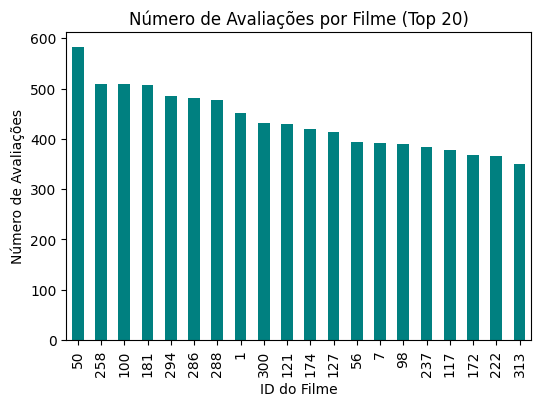

In [5]:
# Número de avaliações por filme
movie_ratings_count = evaluate.groupby('movie_id')['rating'].count().sort_values(ascending=False)

# Plotar a distribuição de avaliações por filme
plt.figure(figsize=(6, 4))
movie_ratings_count.head(20).plot(kind='bar', color='teal')
plt.title('Número de Avaliações por Filme (Top 20)')
plt.xlabel('ID do Filme')
plt.ylabel('Número de Avaliações')
plt.show()

##### Número de avaliações por usuário

Anaisando o gráfico, vemos que o usuário id 405 é o que mais comparece nas avaliações. 

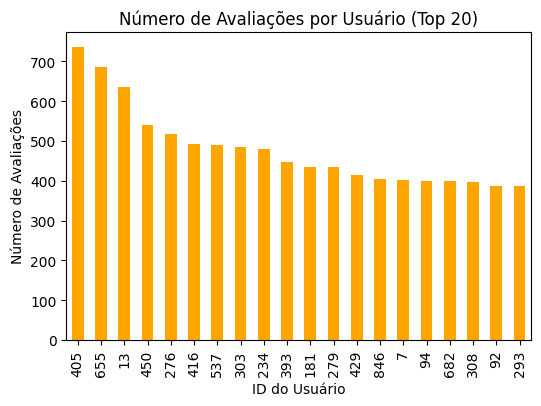

In [6]:
# Número de avaliações por usuário
user_ratings_count = evaluate.groupby('user_id')['rating'].count().sort_values(ascending=False)

# Plotar a distribuição de avaliações por usuário
plt.figure(figsize=(6, 4))
user_ratings_count.head(20).plot(kind='bar', color='orange')
plt.title('Número de Avaliações por Usuário (Top 20)')
plt.xlabel('ID do Usuário')
plt.ylabel('Número de Avaliações')
plt.show()

##### Distribuição de gênero dos filmes

Dentre os filmes existentes na base de dados, os de gênero de drama tem a maior quantidade e o de gênero fantasia menor quantidade.

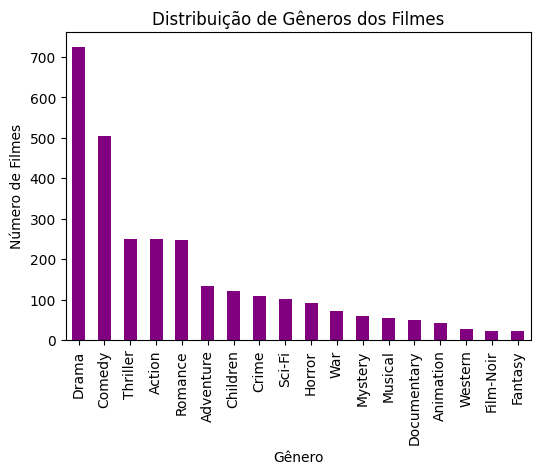

In [7]:
# Contar o número de filmes em cada gênero
genre_columns = movies.columns[6:]  # Os gêneros começam na 7ª coluna (índice 6)

# Contar o número de filmes em cada gênero
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)

# Plotar a distribuição dos gêneros
plt.figure(figsize=(6, 4))
genre_counts.plot(kind='bar', color='purple')
plt.title('Distribuição de Gêneros dos Filmes')
plt.xlabel('Gênero')
plt.ylabel('Número de Filmes')
plt.show()

##### Filmes mais populares top 10

Dentre os filmes populares no top 10, o mais popular é o Star Wars

In [8]:
# Ordenar a contagem de avaliações por filme em ordem decrescente
top_10_movies = pd.DataFrame(movie_ratings_count).head(10)

top_10_movies = top_10_movies.reset_index()

popular_movies = pd.merge(top_10_movies, movies, on='movie_id', how='inner') 

popular_movies[['movie_id', 'title', 'rating']]

,movie_id,title,rating
0,50,Star Wars (1977),583
1,258,Contact (1997),509
2,100,Fargo (1996),508
3,181,Return of the Jedi (1983),507
4,294,Liar Liar (1997),485
5,286,"English Patient, The (1996)",481
6,288,Scream (1996),478
7,1,Toy Story (1995),452
8,300,Air Force One (1997),431
9,121,Independence Day (ID4) (1996),429


##### Visualizar quais filmes os usuários mais ativos 

Filmes mais avaliados pelo usuários

In [9]:
# Top 10 usuários mais ativos
top_10_users = user_ratings_count.head(10)

# Ver os filmes avaliados por esses usuários
active_users_ratings = evaluate[evaluate['user_id'].isin(top_10_users.index)]
active_users_movie_counts = active_users_ratings.groupby('movie_id')['rating'].count().sort_values(ascending=False)

# Exibir os filmes mais avaliados por usuários ativos
top_10_active_movies = movies[movies['movie_id'].isin(active_users_movie_counts.head(10).index)]
pd.DataFrame(top_10_active_movies[['movie_id', 'title']])

,movie_id,title
3,4,Get Shorty (1995)
49,50,Star Wars (1977)
55,56,Pulp Fiction (1994)
78,79,"Fugitive, The (1993)"
317,318,Schindler's List (1993)
356,357,One Flew Over the Cuckoo's Nest (1975)
384,385,True Lies (1994)
422,423,E.T. the Extra-Terrestrial (1982)
654,655,Stand by Me (1986)
738,739,Pretty Woman (1990)


#### Teste de Modelos

##### Criando matriz de interações

In [18]:
# Criar a matriz de interações (usuário x filme)
rating_matrix = evaluate.pivot_table(index="user_id", columns="movie_id", values="rating")

# Substituir valores NaN por 0
rating_matrix = rating_matrix.fillna(0)

# Exibir as primeiras linhas
rating_matrix.shape

(943, 1682)

##### Calcular a similaridade de cosseno entre os filmes

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Converter a matriz para formato esparso
rating_matrix_sparse = csr_matrix(rating_matrix)

# Calcular a similaridade de cosseno entre os filmes
similarity_matrix = cosine_similarity(rating_matrix_sparse.T)

# Criar um DataFrame para visualizar as similaridades
similarity_df = pd.DataFrame(similarity_matrix, index=rating_matrix.columns, columns=rating_matrix.columns)

# Exibir as primeiras linhas da similaridade
similarity_df.shape

(1682, 1682)

##### Calculando as recomendações

In [36]:
import numpy as np

def recommend_movies(movie_id, rating_matrix, similarity_matrix, top_n=10):
    # Verificar se o filme existe na matriz
    if movie_id not in rating_matrix.columns:
        print(f"Filme com id {movie_id} não encontrado.")
        return []
    
    # Obter os índices de similaridade para o filme de entrada
    movie_similarity_scores = similarity_matrix[movie_id].values
    
    # Transpor a matriz de avaliações para alinhar as dimensões (n_usuarios x n_filmes)
    transposed_ratings = rating_matrix.values.T  # Agora é (n_filmes, n_usuarios)
    
    # Calcular as pontuações de recomendação
    scores = np.dot(movie_similarity_scores, transposed_ratings)  # Produto escalar para calcular as pontuações
    
    # Normalização: subtrair a média das avaliações dos filmes (com a forma correta)
    movie_avg_ratings = rating_matrix.mean(axis=0).values  # A média por filme
    
    # Subtrair a média de cada filme de sua respectiva pontuação
    for i in range(len(scores)):
        scores[i] -= movie_avg_ratings[i]  # Subtrair a média de avaliações do filme

    # Ordenar os filmes por pontuação (em ordem decrescente)
    recommended_movie_ids = scores.argsort()[-top_n:][::-1]  # Pega os top_n filmes
    
    # Obter os títulos dos filmes recomendados
    recommended_movies = movies[movies['movie_id'].isin(recommended_movie_ids)]
    
    return recommended_movies[['movie_id', 'title']]

# Exemplo de recomendação para um filme com id 1
recommended_movies = recommend_movies(movie_id=5, rating_matrix=rating_matrix, similarity_matrix=similarity_df)
recommended_movies

,movie_id,title
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
11,12,"Usual Suspects, The (1995)"
57,58,Quiz Show (1994)
92,93,Welcome to the Dollhouse (1995)
128,129,Bound (1996)
274,275,Sense and Sensibility (1995)
301,302,L.A. Confidential (1997)
306,307,"Devil's Advocate, The (1997)"
414,415,"Apple Dumpling Gang, The (1975)"
448,449,Star Trek: The Motion Picture (1979)


#### Resultados

Ao aplicar a técnica de recomendação, conseguimos gerar um conjunto de filmes recomendados para um usuário com base no filme escolhido. Como resultado, obtemos uma lista de filmes que são mais semelhantes ao filme inicial, permitindo que o usuário receba sugestões de filmes que possam ser de seu interesse, com base nas preferências de outros usuários com gostos semelhantes.

A precisão das recomendações foi indicada pela lista de filmes gerada. Os filmes recomendados eram de fato relevantes e semelhantes ao filme de entrada, o que é um bom indicativo de que o modelo está funcionando de maneira adequada. Contudo, o modelo não levou em consideração fatores como popularidade dos filmes ou características adicionais, como o gênero, o que pode ser um ponto de melhoria para aumentar a qualidade da recomendação